In [4]:
import numpy as np
import pandas as pd
import os

In [5]:
DATADIR = 'dataset/'

# 讀入檔案

In [6]:
dataset = pd.read_table('C:/Users/mb207/Desktop/airfoil_self_noise.dat',header = None, sep='\s+')

dataset

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [13]:
y = dataset.iloc[:,5]
X = dataset.drop([5], axis=1)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 預測

## >Random Forest

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

RMSE：6.163578282461184
MAPE：3.8124994705152155
RMSE：5.165337493218778
MAPE：3.297875563068029
RMSE：4.535484495880085
MAPE：2.9039134598230545
RMSE：3.9753734726344705
MAPE：2.5793590118802623
RMSE：3.416518373603299
MAPE：2.206677811083306
RMSE：2.9185423341941377
MAPE：1.8668837261113573
RMSE：2.5376178741971454
MAPE：1.6058501919864667
RMSE：2.2408666316377865
MAPE：1.394203414928036
RMSE：2.0326949961430887
MAPE：1.2346081650203806
RMSE：1.9191656299361033
MAPE：1.1316335669742101
RMSE：1.856825838618667
MAPE：1.0694548385688345
RMSE：1.814830824688233
MAPE：1.0332972487352143
RMSE：1.7987128241730834
MAPE：1.0161293625883745
RMSE：1.7842900532422656
MAPE：1.0066689734206449
RMSE：1.7797783724119258
MAPE：1.0027153995689193
RMSE：1.7726322497257845
MAPE：1.0002660296383847
RMSE：1.7740822316647613
MAPE：0.9979446910126332
RMSE：1.7745390899665139
MAPE：0.9983158327543555
RMSE：1.773653491505622
MAPE：0.9971416387384727


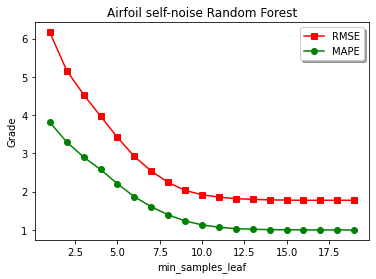

In [100]:
import matplotlib.pyplot as plt
def MAPE(predict,target):
    return ( abs((target - predict) / target).mean()) * 100
def train_and_predict_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    X_pred = model.predict(X_train)
    print('RMSE：' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    print('MAPE：' + str(MAPE(y_pred, y_test)))
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred)),MAPE(y_pred, y_test)

def train_and_predict_model2(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    X_pred = model.predict(X_train)
    print('RMSE：' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    print('MAPE：' + str(MAPE(y_pred, y_test)))
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred)),MAPE(y_pred, y_test),np.sqrt(metrics.mean_squared_error(y_train, X_pred)),MAPE(X_pred, y_train)

ran = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
RMSE_list = []
MAPE_list = []
val_RMSE_list = []
val_MAPE_list = []
max_MAPE = 0
max_RMSE = 0
depth_MAPE = 0
depth_RMSE = 0
for i in range(1,20):
#     for y in range(1,40):
    model = RandomForestRegressor(max_depth = i, n_estimators = 400, random_state=0)

    A,B,C,D = train_and_predict_model2(X_train, X_test, y_train, y_test, model)
    RMSE_list.append(A)
    MAPE_list.append(B)

fig , ax = plt.subplots()

plt.title("Airfoil self-noise Random Forest")
plt.xlabel("min_samples_leaf")
plt.ylabel("Grade")


plt.plot(range(1,20),RMSE_list,'s-',color = 'r',label="RMSE")
plt.plot(range(1,20),MAPE_list,'o-',color = 'g',label="MAPE")

ax.legend(loc='upper right', shadow=True) 

## >Random Forest best grade

In [101]:
model = RandomForestRegressor(max_depth = 17, n_estimators = 400, random_state=0)

A,B,C,D = train_and_predict_model2(X_train, X_test, y_train, y_test, model)

print(A,B)

RMSE：1.7740822316647613
MAPE：0.9979446910126332
1.7740822316647613 0.9979446910126332


## >XGBoost

In [109]:
import xgboost as xg

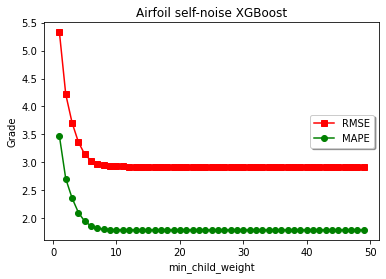

In [112]:
RMSE_list = []
MAPE_list = []
for i in range(1,50):
    XGModel = xg.XGBRegressor(objective ='reg:squarederror',gpu_id = 0,learning_rate = 0.01, n_estimators = 500, max_depth = i, min_child_weight = 4, gamma = 0.5, subsample = 0.8, colsample_bytree = 0.7, reg_alpha = 3, reg_lambda = 3) 
    XGModel.fit(X_train,y_train)
    y_pred = XGModel.predict(X_test)
    RMSE_list.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    MAPE_list.append(MAPE(y_pred, y_test))
fig , ax = plt.subplots()
plt.title("Airfoil self-noise XGBoost")
plt.xlabel("min_child_weight")
plt.ylabel("Grade")
plt.plot(range(1,50),RMSE_list,'s-',color = 'r',label="RMSE")
plt.plot(range(1,50),MAPE_list,'o-',color = 'g',label="MAPE")
ax.legend(loc='right', shadow=True) 

In [117]:
print(RMSE_list.index(min(RMSE_list)))

13


## >XGBoost best grade

In [114]:
XGModel = xg.XGBRegressor(objective ='reg:squarederror',gpu_id = 0,learning_rate = 0.01, n_estimators = 500, max_depth = 13, min_child_weight = 4, gamma = 0.5, subsample = 0.8, colsample_bytree = 0.7, reg_alpha = 3, reg_lambda = 3) 
XGModel.fit(X_train,y_train)
y_pred = XGModel.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),MAPE(y_pred, y_test))

2.9271119914995847 1.7924851801130952


In [42]:

# print('RMSE：' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
# print('MAPE：' + str(MAPE(y_pred, y_test)))

RMSE：2.972280206290947
MAPE：1.8211402010025555


## >SVR

In [75]:
from sklearn.svm import SVR
import datetime

kernel:  1
運行時間:  0:00:00.157519
RMSE：6.675191921960596
MAPE：4.214200647924111
kernel:  2
運行時間:  0:00:00.170575
RMSE：6.64982174014099
MAPE：4.193919041699017
kernel:  3
運行時間:  0:00:00.163528
RMSE：6.629344988453889
MAPE：4.178657526131304
kernel:  4
運行時間:  0:00:00.146506
RMSE：6.612676113598261
MAPE：4.1644818995477
kernel:  5
運行時間:  0:00:00.137464
RMSE：6.595316991686608
MAPE：4.1503838974589184
kernel:  6
運行時間:  0:00:00.148492
RMSE：6.580799407012744
MAPE：4.142772786742286
kernel:  7
運行時間:  0:00:00.147484
RMSE：6.569020761704118
MAPE：4.141439130524175
kernel:  8
運行時間:  0:00:00.160033
RMSE：6.562243948184916
MAPE：4.13954045018035
kernel:  9
運行時間:  0:00:00.129929
RMSE：6.5571798861801724
MAPE：4.1350470087065725
kernel:  10
運行時間:  0:00:00.152516
RMSE：6.549268853139398
MAPE：4.130848525436265
kernel:  11
運行時間:  0:00:00.137345
RMSE：6.543999964910995
MAPE：4.129675336434082
kernel:  12
運行時間:  0:00:00.128454
RMSE：6.543156010735326
MAPE：4.1309502123212365
kernel:  13
運行時間:  0:00:00.116764
RMSE：6.54580117

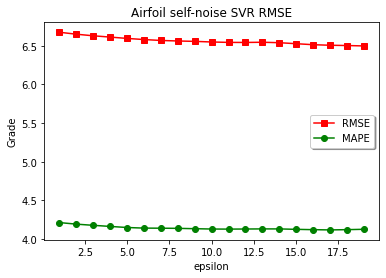

In [84]:
kernel_list = [ 'rbf', 'sigmoid']
rbf = 0
sigmoid = 0
RMSE_list = []
MAPE_list = []
for i in range(1,20):
    svr_poly = SVR(kernel='rbf', C=3, gamma='auto',epsilon = i*0.2)
    starttime = datetime.datetime.now()
    SVRModel = svr_poly.fit(X_train,y_train)
    y_pred = SVRModel.predict(X_test)

    #long running
    endtime = datetime.datetime.now()
    print('kernel: ',i)
    print ('運行時間: ',endtime - starttime)
    print('RMSE：' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    print('MAPE：' + str(MAPE(y_pred, y_test)))
    RMSE_list.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    MAPE_list.append(MAPE(y_pred, y_test))
fig , ax = plt.subplots()
plt.title("Airfoil self-noise SVR RMSE")
plt.xlabel("epsilon")
plt.ylabel("Grade")
plt.plot(ran,RMSE_list,'s-',color = 'r',label="RMSE")
plt.plot(ran,MAPE_list,'o-',color = 'g',label="MAPE")
ax.legend(loc='right', shadow=True) 
plt.show()

# >SVR_best grade

In [107]:
    svr_poly = SVR(kernel='rbf', C=3, gamma='auto',epsilon = i*0.2)
    SVRModel = svr_poly.fit(X_train,y_train)
    y_pred = SVRModel.predict(X_test)
    print('RMSE：' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    print('MAPE：' + str(MAPE(y_pred, y_test)))

RMSE：6.498175282987517
MAPE：4.127447063568008


RMSE：6.688565049020094
MAPE：4.2245797002208025


## >類神經網路

In [11]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [12]:
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.losses import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Dense(12, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss=root_mean_squared_error, optimizer='adam', metrics=[mean_absolute_percentage_error])

history = model.fit(X_train, y_train, epochs=5000, batch_size=50,  verbose=1)

Epoch 1/5000
25/25 [==============================] - 0s 2ms/step - loss: 135.7550 - mean_absolute_percentage_error: 83.7610
Epoch 2/5000
25/25 [==============================] - 0s 2ms/step - loss: 94.7908 - mean_absolute_percentage_error: 69.4177
Epoch 3/5000
25/25 [==============================] - 0s 2ms/step - loss: 90.9309 - mean_absolute_percentage_error: 65.7266
Epoch 4/5000
25/25 [==============================] - 0s 2ms/step - loss: 90.1217 - mean_absolute_percentage_error: 64.9734
Epoch 5/5000
25/25 [==============================] - 0s 2ms/step - loss: 91.1560 - mean_absolute_percentage_error: 67.9528
Epoch 6/5000
25/25 [==============================] - 0s 2ms/step - loss: 87.3967 - mean_absolute_percentage_error: 62.7860
Epoch 7/5000
25/25 [==============================] - 0s 2ms/step - loss: 88.4734 - mean_absolute_percentage_error: 65.3741
Epoch 8/5000
25/25 [==============================] - 0s 2ms/step - loss: 84.9644 - mean_absolute_percentage_error: 60.8087
Epoch 9

25/25 [==============================] - 0s 1ms/step - loss: 32.6398 - mean_absolute_percentage_error: 21.9417
Epoch 132/5000
25/25 [==============================] - 0s 1ms/step - loss: 33.8722 - mean_absolute_percentage_error: 22.9109
Epoch 133/5000
25/25 [==============================] - 0s 1ms/step - loss: 32.7151 - mean_absolute_percentage_error: 22.0409
Epoch 134/5000
25/25 [==============================] - 0s 1ms/step - loss: 30.6402 - mean_absolute_percentage_error: 21.1937
Epoch 135/5000
25/25 [==============================] - 0s 1ms/step - loss: 30.5442 - mean_absolute_percentage_error: 21.1810
Epoch 136/5000
25/25 [==============================] - 0s 1ms/step - loss: 31.4307 - mean_absolute_percentage_error: 21.5595
Epoch 137/5000
25/25 [==============================] - 0s 1ms/step - loss: 30.3684 - mean_absolute_percentage_error: 21.1169
Epoch 138/5000
25/25 [==============================] - 0s 1ms/step - loss: 30.4764 - mean_absolute_percentage_error: 21.1038
Epoch 1

25/25 [==============================] - 0s 1ms/step - loss: 27.3556 - mean_absolute_percentage_error: 18.3836
Epoch 262/5000
25/25 [==============================] - 0s 1ms/step - loss: 26.4103 - mean_absolute_percentage_error: 18.0742
Epoch 263/5000
25/25 [==============================] - 0s 1ms/step - loss: 28.3892 - mean_absolute_percentage_error: 19.0550
Epoch 264/5000
25/25 [==============================] - 0s 1ms/step - loss: 26.0862 - mean_absolute_percentage_error: 17.8728
Epoch 265/5000
25/25 [==============================] - 0s 1ms/step - loss: 26.6317 - mean_absolute_percentage_error: 18.1079
Epoch 266/5000
25/25 [==============================] - 0s 1ms/step - loss: 25.8292 - mean_absolute_percentage_error: 17.6879
Epoch 267/5000
25/25 [==============================] - 0s 1ms/step - loss: 26.5351 - mean_absolute_percentage_error: 17.8663
Epoch 268/5000
25/25 [==============================] - 0s 1ms/step - loss: 26.6209 - mean_absolute_percentage_error: 18.2519
Epoch 2

25/25 [==============================] - 0s 1ms/step - loss: 17.5001 - mean_absolute_percentage_error: 11.7195
Epoch 392/5000
25/25 [==============================] - 0s 1ms/step - loss: 17.4438 - mean_absolute_percentage_error: 11.6168
Epoch 393/5000
25/25 [==============================] - 0s 1ms/step - loss: 18.0111 - mean_absolute_percentage_error: 11.9018
Epoch 394/5000
25/25 [==============================] - 0s 1ms/step - loss: 17.6782 - mean_absolute_percentage_error: 11.7533
Epoch 395/5000
25/25 [==============================] - 0s 1ms/step - loss: 22.3969 - mean_absolute_percentage_error: 14.2383
Epoch 396/5000
25/25 [==============================] - 0s 1ms/step - loss: 17.1857 - mean_absolute_percentage_error: 11.5357
Epoch 397/5000
25/25 [==============================] - 0s 1ms/step - loss: 16.8370 - mean_absolute_percentage_error: 11.2929
Epoch 398/5000
25/25 [==============================] - 0s 1ms/step - loss: 18.4258 - mean_absolute_percentage_error: 12.0852
Epoch 3

25/25 [==============================] - 0s 1ms/step - loss: 11.6475 - mean_absolute_percentage_error: 7.2826
Epoch 522/5000
25/25 [==============================] - 0s 1ms/step - loss: 8.9830 - mean_absolute_percentage_error: 5.8262
Epoch 523/5000
25/25 [==============================] - 0s 1ms/step - loss: 9.3764 - mean_absolute_percentage_error: 6.0260
Epoch 524/5000
25/25 [==============================] - 0s 1ms/step - loss: 9.4938 - mean_absolute_percentage_error: 6.0623
Epoch 525/5000
25/25 [==============================] - 0s 1ms/step - loss: 9.1466 - mean_absolute_percentage_error: 5.9102
Epoch 526/5000
25/25 [==============================] - 0s 1ms/step - loss: 9.0503 - mean_absolute_percentage_error: 5.8734
Epoch 527/5000
25/25 [==============================] - 0s 1ms/step - loss: 9.1201 - mean_absolute_percentage_error: 5.9206
Epoch 528/5000
25/25 [==============================] - 0s 1ms/step - loss: 9.5071 - mean_absolute_percentage_error: 6.0528
Epoch 529/5000
25/25 [

25/25 [==============================] - 0s 1ms/step - loss: 8.3749 - mean_absolute_percentage_error: 5.4900
Epoch 588/5000
25/25 [==============================] - 0s 1ms/step - loss: 8.7428 - mean_absolute_percentage_error: 5.6499
Epoch 589/5000
25/25 [==============================] - 0s 1ms/step - loss: 8.3555 - mean_absolute_percentage_error: 5.4558
Epoch 590/5000
25/25 [==============================] - 0s 1ms/step - loss: 8.6592 - mean_absolute_percentage_error: 5.5897
Epoch 591/5000
25/25 [==============================] - 0s 1ms/step - loss: 8.1695 - mean_absolute_percentage_error: 5.3256
Epoch 592/5000
25/25 [==============================] - 0s 1ms/step - loss: 8.0994 - mean_absolute_percentage_error: 5.2923
Epoch 593/5000
25/25 [==============================] - 0s 1ms/step - loss: 8.2758 - mean_absolute_percentage_error: 5.3731
Epoch 594/5000
25/25 [==============================] - 0s 1ms/step - loss: 8.8145 - mean_absolute_percentage_error: 5.6050
Epoch 595/5000
25/25 [=

25/25 [==============================] - 0s 1ms/step - loss: 8.7859 - mean_absolute_percentage_error: 5.5139
Epoch 654/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.9937 - mean_absolute_percentage_error: 5.1988
Epoch 655/5000
25/25 [==============================] - 0s 1ms/step - loss: 8.5109 - mean_absolute_percentage_error: 5.3902
Epoch 656/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.8854 - mean_absolute_percentage_error: 5.0409
Epoch 657/5000
25/25 [==============================] - 0s 1ms/step - loss: 8.6989 - mean_absolute_percentage_error: 5.4430
Epoch 658/5000
25/25 [==============================] - 0s 1ms/step - loss: 8.1859 - mean_absolute_percentage_error: 5.2598
Epoch 659/5000
25/25 [==============================] - 0s 1ms/step - loss: 8.4362 - mean_absolute_percentage_error: 5.3559
Epoch 660/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.5771 - mean_absolute_percentage_error: 4.9295
Epoch 661/5000
25/25 [=

25/25 [==============================] - 0s 1ms/step - loss: 7.5407 - mean_absolute_percentage_error: 4.7838
Epoch 786/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.7255 - mean_absolute_percentage_error: 4.9440
Epoch 787/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.9432 - mean_absolute_percentage_error: 5.0056
Epoch 788/5000
25/25 [==============================] - 0s 1ms/step - loss: 13.1590 - mean_absolute_percentage_error: 7.6859
Epoch 789/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.3252 - mean_absolute_percentage_error: 4.6596
Epoch 790/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.8135 - mean_absolute_percentage_error: 4.4315
Epoch 791/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.5581 - mean_absolute_percentage_error: 4.7706
Epoch 792/5000
25/25 [==============================] - 0s 1ms/step - loss: 9.5399 - mean_absolute_percentage_error: 5.7925
Epoch 793/5000
25/25 [

25/25 [==============================] - 0s 1ms/step - loss: 6.1874 - mean_absolute_percentage_error: 4.0553
Epoch 918/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.2847 - mean_absolute_percentage_error: 4.5838
Epoch 919/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.1598 - mean_absolute_percentage_error: 4.0389
Epoch 920/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.8883 - mean_absolute_percentage_error: 4.8236
Epoch 921/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.8314 - mean_absolute_percentage_error: 4.7956
Epoch 922/5000
25/25 [==============================] - 0s 1ms/step - loss: 9.4074 - mean_absolute_percentage_error: 5.7959
Epoch 923/5000
25/25 [==============================] - 0s 1ms/step - loss: 17.5945 - mean_absolute_percentage_error: 10.2229
Epoch 924/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.6279 - mean_absolute_percentage_error: 4.1811
Epoch 925/5000
25/25 

25/25 [==============================] - 0s 1ms/step - loss: 6.1451 - mean_absolute_percentage_error: 3.9472
Epoch 1048/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.7968 - mean_absolute_percentage_error: 4.3100
Epoch 1049/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.0788 - mean_absolute_percentage_error: 4.4126
Epoch 1050/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.3348 - mean_absolute_percentage_error: 3.9617
Epoch 1051/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.9041 - mean_absolute_percentage_error: 4.3508
Epoch 1052/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.4917 - mean_absolute_percentage_error: 4.0925
Epoch 1053/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.2314 - mean_absolute_percentage_error: 4.4579
Epoch 1054/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.6206 - mean_absolute_percentage_error: 3.6914
Epoch 1055/5000


25/25 [==============================] - 0s 1ms/step - loss: 10.7933 - mean_absolute_percentage_error: 6.4823
Epoch 1178/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.0775 - mean_absolute_percentage_error: 4.4480
Epoch 1179/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.7031 - mean_absolute_percentage_error: 3.6562
Epoch 1180/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.5982 - mean_absolute_percentage_error: 3.5738
Epoch 1181/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.2812 - mean_absolute_percentage_error: 3.9384
Epoch 1182/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.0870 - mean_absolute_percentage_error: 3.8506
Epoch 1183/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.3723 - mean_absolute_percentage_error: 4.0056
Epoch 1184/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.2405 - mean_absolute_percentage_error: 3.9227
Epoch 1185/5000

25/25 [==============================] - 0s 1ms/step - loss: 5.7359 - mean_absolute_percentage_error: 3.6766
Epoch 1308/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.2529 - mean_absolute_percentage_error: 3.9161
Epoch 1309/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.8077 - mean_absolute_percentage_error: 3.7050
Epoch 1310/5000
25/25 [==============================] - 0s 1ms/step - loss: 8.2041 - mean_absolute_percentage_error: 5.0795
Epoch 1311/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.8214 - mean_absolute_percentage_error: 3.7189
Epoch 1312/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.4817 - mean_absolute_percentage_error: 3.5131
Epoch 1313/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.4144 - mean_absolute_percentage_error: 3.4364
Epoch 1314/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.2714 - mean_absolute_percentage_error: 3.9678
Epoch 1315/5000


25/25 [==============================] - 0s 1ms/step - loss: 6.9517 - mean_absolute_percentage_error: 4.4428
Epoch 1438/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.5444 - mean_absolute_percentage_error: 4.1761
Epoch 1439/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.0615 - mean_absolute_percentage_error: 3.7860
Epoch 1440/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.6908 - mean_absolute_percentage_error: 4.1932
Epoch 1441/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.5132 - mean_absolute_percentage_error: 4.1454
Epoch 1442/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.9912 - mean_absolute_percentage_error: 4.9756
Epoch 1443/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.4671 - mean_absolute_percentage_error: 3.4675
Epoch 1444/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.5630 - mean_absolute_percentage_error: 3.5012
Epoch 1445/5000


25/25 [==============================] - 0s 1ms/step - loss: 7.1780 - mean_absolute_percentage_error: 4.5096
Epoch 1568/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.7436 - mean_absolute_percentage_error: 3.6222
Epoch 1569/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.6296 - mean_absolute_percentage_error: 3.5368
Epoch 1570/5000
25/25 [==============================] - 0s 1ms/step - loss: 9.6069 - mean_absolute_percentage_error: 5.8886
Epoch 1571/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.4872 - mean_absolute_percentage_error: 3.5302
Epoch 1572/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.3897 - mean_absolute_percentage_error: 4.0338
Epoch 1573/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.3704 - mean_absolute_percentage_error: 4.0262
Epoch 1574/5000
25/25 [==============================] - 0s 1ms/step - loss: 11.5374 - mean_absolute_percentage_error: 7.0916
Epoch 1575/5000

25/25 [==============================] - 0s 1ms/step - loss: 4.9601 - mean_absolute_percentage_error: 3.1644
Epoch 1698/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.5018 - mean_absolute_percentage_error: 4.7067
Epoch 1699/5000
25/25 [==============================] - 0s 2ms/step - loss: 4.9933 - mean_absolute_percentage_error: 3.1869
Epoch 1700/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.2874 - mean_absolute_percentage_error: 4.0089
Epoch 1701/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.7858 - mean_absolute_percentage_error: 4.8083
Epoch 1702/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.5179 - mean_absolute_percentage_error: 3.5408
Epoch 1703/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.4502 - mean_absolute_percentage_error: 3.4543
Epoch 1704/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.6370 - mean_absolute_percentage_error: 3.5867
Epoch 1705/5000


25/25 [==============================] - 0s 1ms/step - loss: 5.1513 - mean_absolute_percentage_error: 3.2635
Epoch 1828/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.3509 - mean_absolute_percentage_error: 3.3637
Epoch 1829/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.2008 - mean_absolute_percentage_error: 3.2927
Epoch 1830/5000
25/25 [==============================] - 0s 1ms/step - loss: 8.9349 - mean_absolute_percentage_error: 5.5745
Epoch 1831/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.0586 - mean_absolute_percentage_error: 3.8528
Epoch 1832/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.7679 - mean_absolute_percentage_error: 4.8965
Epoch 1833/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.9751 - mean_absolute_percentage_error: 3.1587
Epoch 1834/5000
25/25 [==============================] - 0s 1ms/step - loss: 9.2802 - mean_absolute_percentage_error: 5.7645
Epoch 1835/5000


25/25 [==============================] - 0s 1ms/step - loss: 6.1659 - mean_absolute_percentage_error: 3.9354
Epoch 1958/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.8268 - mean_absolute_percentage_error: 3.7019
Epoch 1959/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.8412 - mean_absolute_percentage_error: 3.6560
Epoch 1960/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.1130 - mean_absolute_percentage_error: 4.5526
Epoch 1961/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.6864 - mean_absolute_percentage_error: 3.5931
Epoch 1962/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.0532 - mean_absolute_percentage_error: 3.1917
Epoch 1963/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.8082 - mean_absolute_percentage_error: 4.2376
Epoch 1964/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.1990 - mean_absolute_percentage_error: 3.2605
Epoch 1965/5000


25/25 [==============================] - 0s 1ms/step - loss: 5.6381 - mean_absolute_percentage_error: 3.5661
Epoch 2088/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.1383 - mean_absolute_percentage_error: 3.2630
Epoch 2089/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.0212 - mean_absolute_percentage_error: 3.8006
Epoch 2090/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.8680 - mean_absolute_percentage_error: 3.7017
Epoch 2091/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.3271 - mean_absolute_percentage_error: 3.3694
Epoch 2092/5000
25/25 [==============================] - 0s 1ms/step - loss: 8.6238 - mean_absolute_percentage_error: 5.3911
Epoch 2093/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.3058 - mean_absolute_percentage_error: 3.3936
Epoch 2094/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.9370 - mean_absolute_percentage_error: 3.1570
Epoch 2095/5000


25/25 [==============================] - 0s 1ms/step - loss: 7.3340 - mean_absolute_percentage_error: 4.6761
Epoch 2218/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.4938 - mean_absolute_percentage_error: 3.5315
Epoch 2219/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.5620 - mean_absolute_percentage_error: 3.4935
Epoch 2220/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.2210 - mean_absolute_percentage_error: 3.3021
Epoch 2221/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.0205 - mean_absolute_percentage_error: 3.1891
Epoch 2222/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.7357 - mean_absolute_percentage_error: 3.6186
Epoch 2223/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.7091 - mean_absolute_percentage_error: 4.1877
Epoch 2224/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.5671 - mean_absolute_percentage_error: 4.1526
Epoch 2225/5000


25/25 [==============================] - 0s 1ms/step - loss: 5.0287 - mean_absolute_percentage_error: 3.1672
Epoch 2348/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.3679 - mean_absolute_percentage_error: 3.3955
Epoch 2349/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.7707 - mean_absolute_percentage_error: 3.5772
Epoch 2350/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.0708 - mean_absolute_percentage_error: 3.1989
Epoch 2351/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.1406 - mean_absolute_percentage_error: 3.8651
Epoch 2352/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.6805 - mean_absolute_percentage_error: 4.1773
Epoch 2353/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.5812 - mean_absolute_percentage_error: 3.5287
Epoch 2354/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.2908 - mean_absolute_percentage_error: 3.3745
Epoch 2355/5000


25/25 [==============================] - 0s 1ms/step - loss: 5.0388 - mean_absolute_percentage_error: 3.1853
Epoch 2478/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.9417 - mean_absolute_percentage_error: 3.7975
Epoch 2479/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.7103 - mean_absolute_percentage_error: 4.8207
Epoch 2480/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.5154 - mean_absolute_percentage_error: 3.4748
Epoch 2481/5000
25/25 [==============================] - 0s 1ms/step - loss: 14.6815 - mean_absolute_percentage_error: 8.8116
Epoch 2482/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.0288 - mean_absolute_percentage_error: 4.4072
Epoch 2483/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.5104 - mean_absolute_percentage_error: 4.1433
Epoch 2484/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.6742 - mean_absolute_percentage_error: 3.6328
Epoch 2485/5000

25/25 [==============================] - 0s 1ms/step - loss: 5.3126 - mean_absolute_percentage_error: 3.3996
Epoch 2608/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.0215 - mean_absolute_percentage_error: 3.1453
Epoch 2609/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.0200 - mean_absolute_percentage_error: 3.1952
Epoch 2610/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.3266 - mean_absolute_percentage_error: 3.3728
Epoch 2611/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.2850 - mean_absolute_percentage_error: 3.3931
Epoch 2612/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.1836 - mean_absolute_percentage_error: 3.2999
Epoch 2613/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.7739 - mean_absolute_percentage_error: 4.2255
Epoch 2614/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.2807 - mean_absolute_percentage_error: 3.3617
Epoch 2615/5000


25/25 [==============================] - 0s 1ms/step - loss: 6.4564 - mean_absolute_percentage_error: 4.0793
Epoch 2738/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.3099 - mean_absolute_percentage_error: 3.3826
Epoch 2739/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.3073 - mean_absolute_percentage_error: 3.3977
Epoch 2740/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.1449 - mean_absolute_percentage_error: 3.2488
Epoch 2741/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.3270 - mean_absolute_percentage_error: 3.3465
Epoch 2742/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.9431 - mean_absolute_percentage_error: 4.3736
Epoch 2743/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.0523 - mean_absolute_percentage_error: 3.8048
Epoch 2744/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.4554 - mean_absolute_percentage_error: 3.4918
Epoch 2745/5000


25/25 [==============================] - 0s 1ms/step - loss: 5.4657 - mean_absolute_percentage_error: 3.4523
Epoch 2868/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.2518 - mean_absolute_percentage_error: 3.3331
Epoch 2869/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.4179 - mean_absolute_percentage_error: 3.3991
Epoch 2870/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.7424 - mean_absolute_percentage_error: 3.6114
Epoch 2871/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.2871 - mean_absolute_percentage_error: 3.3391
Epoch 2872/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.3359 - mean_absolute_percentage_error: 3.3506
Epoch 2873/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.1015 - mean_absolute_percentage_error: 3.2575
Epoch 2874/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.7121 - mean_absolute_percentage_error: 3.6218
Epoch 2875/5000


25/25 [==============================] - 0s 1ms/step - loss: 5.3051 - mean_absolute_percentage_error: 3.3508
Epoch 2998/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.4052 - mean_absolute_percentage_error: 3.4435
Epoch 2999/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.5492 - mean_absolute_percentage_error: 3.5411
Epoch 3000/5000
25/25 [==============================] - 0s 1ms/step - loss: 8.7649 - mean_absolute_percentage_error: 5.4167
Epoch 3001/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.5431 - mean_absolute_percentage_error: 3.5730
Epoch 3002/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.4193 - mean_absolute_percentage_error: 3.4722
Epoch 3003/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.3754 - mean_absolute_percentage_error: 3.4383
Epoch 3004/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.1101 - mean_absolute_percentage_error: 3.2238
Epoch 3005/5000


25/25 [==============================] - 0s 1ms/step - loss: 5.1093 - mean_absolute_percentage_error: 3.2376
Epoch 3128/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.3927 - mean_absolute_percentage_error: 3.4488
Epoch 3129/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.1814 - mean_absolute_percentage_error: 3.2814
Epoch 3130/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.8606 - mean_absolute_percentage_error: 3.0608
Epoch 3131/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.0132 - mean_absolute_percentage_error: 3.1263
Epoch 3132/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.8446 - mean_absolute_percentage_error: 3.0404
Epoch 3133/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.7716 - mean_absolute_percentage_error: 3.0202
Epoch 3134/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.7938 - mean_absolute_percentage_error: 3.0118
Epoch 3135/5000


25/25 [==============================] - 0s 1ms/step - loss: 5.2895 - mean_absolute_percentage_error: 3.3554
Epoch 3258/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.6290 - mean_absolute_percentage_error: 3.5278
Epoch 3259/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.9592 - mean_absolute_percentage_error: 3.1296
Epoch 3260/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.3611 - mean_absolute_percentage_error: 3.3948
Epoch 3261/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.9298 - mean_absolute_percentage_error: 3.7788
Epoch 3262/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.3424 - mean_absolute_percentage_error: 3.3857
Epoch 3263/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.8794 - mean_absolute_percentage_error: 3.0757
Epoch 3264/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.0358 - mean_absolute_percentage_error: 3.2099
Epoch 3265/5000


25/25 [==============================] - 0s 1ms/step - loss: 4.9743 - mean_absolute_percentage_error: 3.1597
Epoch 3388/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.8331 - mean_absolute_percentage_error: 3.0839
Epoch 3389/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.1632 - mean_absolute_percentage_error: 3.3070
Epoch 3390/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.8242 - mean_absolute_percentage_error: 3.6652
Epoch 3391/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.2824 - mean_absolute_percentage_error: 3.3352
Epoch 3392/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.8450 - mean_absolute_percentage_error: 3.0541
Epoch 3393/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.7047 - mean_absolute_percentage_error: 4.2307
Epoch 3394/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.3459 - mean_absolute_percentage_error: 3.4231
Epoch 3395/5000


25/25 [==============================] - 0s 1ms/step - loss: 5.3864 - mean_absolute_percentage_error: 3.4612
Epoch 3518/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.8758 - mean_absolute_percentage_error: 3.1271
Epoch 3519/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.7069 - mean_absolute_percentage_error: 2.9940
Epoch 3520/5000
25/25 [==============================] - 0s 1ms/step - loss: 11.4651 - mean_absolute_percentage_error: 6.9320
Epoch 3521/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.3925 - mean_absolute_percentage_error: 3.4528
Epoch 3522/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.7996 - mean_absolute_percentage_error: 3.0315
Epoch 3523/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.3622 - mean_absolute_percentage_error: 3.4410
Epoch 3524/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.8091 - mean_absolute_percentage_error: 3.0471
Epoch 3525/5000

25/25 [==============================] - 0s 1ms/step - loss: 4.7739 - mean_absolute_percentage_error: 3.0476
Epoch 3648/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.9833 - mean_absolute_percentage_error: 3.1746
Epoch 3649/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.8497 - mean_absolute_percentage_error: 3.0691
Epoch 3650/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.8439 - mean_absolute_percentage_error: 3.0843
Epoch 3651/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.7988 - mean_absolute_percentage_error: 3.0286
Epoch 3652/5000
25/25 [==============================] - 0s 2ms/step - loss: 4.9549 - mean_absolute_percentage_error: 3.1222
Epoch 3653/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.8871 - mean_absolute_percentage_error: 4.3321
Epoch 3654/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.1737 - mean_absolute_percentage_error: 3.8861
Epoch 3655/5000


25/25 [==============================] - 0s 1ms/step - loss: 6.3371 - mean_absolute_percentage_error: 4.0152
Epoch 3778/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.4745 - mean_absolute_percentage_error: 3.4669
Epoch 3779/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.4733 - mean_absolute_percentage_error: 3.4822
Epoch 3780/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.9006 - mean_absolute_percentage_error: 3.0954
Epoch 3781/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.9461 - mean_absolute_percentage_error: 3.1587
Epoch 3782/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.2014 - mean_absolute_percentage_error: 3.3181
Epoch 3783/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.7164 - mean_absolute_percentage_error: 2.9782
Epoch 3784/5000
25/25 [==============================] - 0s 2ms/step - loss: 4.7371 - mean_absolute_percentage_error: 2.9808
Epoch 3785/5000


25/25 [==============================] - 0s 1ms/step - loss: 6.3083 - mean_absolute_percentage_error: 3.9867
Epoch 3908/5000
25/25 [==============================] - 0s 1ms/step - loss: 11.9782 - mean_absolute_percentage_error: 7.4311
Epoch 3909/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.3224 - mean_absolute_percentage_error: 3.3640
Epoch 3910/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.3524 - mean_absolute_percentage_error: 3.4269
Epoch 3911/5000
25/25 [==============================] - 0s 2ms/step - loss: 5.0729 - mean_absolute_percentage_error: 3.2178
Epoch 3912/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.8118 - mean_absolute_percentage_error: 3.0696
Epoch 3913/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.6967 - mean_absolute_percentage_error: 2.9906
Epoch 3914/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.0950 - mean_absolute_percentage_error: 3.2560
Epoch 3915/5000

25/25 [==============================] - 0s 1ms/step - loss: 4.7311 - mean_absolute_percentage_error: 2.9858
Epoch 4038/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.6137 - mean_absolute_percentage_error: 2.9118
Epoch 4039/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.7825 - mean_absolute_percentage_error: 3.0038
Epoch 4040/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.0802 - mean_absolute_percentage_error: 3.2138
Epoch 4041/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.8480 - mean_absolute_percentage_error: 3.1033
Epoch 4042/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.3299 - mean_absolute_percentage_error: 3.3957
Epoch 4043/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.7884 - mean_absolute_percentage_error: 3.0476
Epoch 4044/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.7547 - mean_absolute_percentage_error: 3.0028
Epoch 4045/5000


25/25 [==============================] - 0s 1ms/step - loss: 4.9137 - mean_absolute_percentage_error: 3.1561
Epoch 4168/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.7042 - mean_absolute_percentage_error: 2.9833
Epoch 4169/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.0423 - mean_absolute_percentage_error: 3.2056
Epoch 4170/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.8193 - mean_absolute_percentage_error: 3.6982
Epoch 4171/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.7082 - mean_absolute_percentage_error: 2.9550
Epoch 4172/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.0199 - mean_absolute_percentage_error: 3.1615
Epoch 4173/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.7036 - mean_absolute_percentage_error: 2.9896
Epoch 4174/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.4386 - mean_absolute_percentage_error: 4.1125
Epoch 4175/5000


25/25 [==============================] - 0s 1ms/step - loss: 5.2848 - mean_absolute_percentage_error: 3.3824
Epoch 4298/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.7917 - mean_absolute_percentage_error: 3.0211
Epoch 4299/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.7942 - mean_absolute_percentage_error: 3.0109
Epoch 4300/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.6896 - mean_absolute_percentage_error: 3.6277
Epoch 4301/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.6159 - mean_absolute_percentage_error: 2.9393
Epoch 4302/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.2281 - mean_absolute_percentage_error: 3.3213
Epoch 4303/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.0844 - mean_absolute_percentage_error: 3.2569
Epoch 4304/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.5094 - mean_absolute_percentage_error: 4.1213
Epoch 4305/5000


25/25 [==============================] - 0s 1ms/step - loss: 5.1898 - mean_absolute_percentage_error: 3.2491
Epoch 4428/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.8402 - mean_absolute_percentage_error: 3.0763
Epoch 4429/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.6109 - mean_absolute_percentage_error: 3.5726
Epoch 4430/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.8420 - mean_absolute_percentage_error: 3.0809
Epoch 4431/5000
25/25 [==============================] - 0s 1ms/step - loss: 6.2420 - mean_absolute_percentage_error: 3.9129
Epoch 4432/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.8796 - mean_absolute_percentage_error: 3.0688
Epoch 4433/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.1277 - mean_absolute_percentage_error: 3.2581
Epoch 4434/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.7048 - mean_absolute_percentage_error: 3.6029
Epoch 4435/5000


25/25 [==============================] - 0s 1ms/step - loss: 4.8618 - mean_absolute_percentage_error: 3.0709
Epoch 4558/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.9605 - mean_absolute_percentage_error: 3.1759
Epoch 4559/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.8604 - mean_absolute_percentage_error: 3.0909
Epoch 4560/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.7055 - mean_absolute_percentage_error: 3.5603
Epoch 4561/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.6615 - mean_absolute_percentage_error: 2.9325
Epoch 4562/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.0700 - mean_absolute_percentage_error: 3.2157
Epoch 4563/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.2839 - mean_absolute_percentage_error: 3.2738
Epoch 4564/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.9248 - mean_absolute_percentage_error: 3.1141
Epoch 4565/5000


25/25 [==============================] - 0s 1ms/step - loss: 4.7856 - mean_absolute_percentage_error: 3.0334
Epoch 4688/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.9653 - mean_absolute_percentage_error: 3.1226
Epoch 4689/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.8608 - mean_absolute_percentage_error: 3.0404
Epoch 4690/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.7434 - mean_absolute_percentage_error: 2.9987
Epoch 4691/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.9896 - mean_absolute_percentage_error: 3.1620
Epoch 4692/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.4016 - mean_absolute_percentage_error: 3.3662
Epoch 4693/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.2541 - mean_absolute_percentage_error: 3.3058
Epoch 4694/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.6777 - mean_absolute_percentage_error: 2.9566
Epoch 4695/5000


25/25 [==============================] - 0s 1ms/step - loss: 4.8861 - mean_absolute_percentage_error: 3.0670
Epoch 4818/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.4759 - mean_absolute_percentage_error: 3.4062
Epoch 4819/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.5989 - mean_absolute_percentage_error: 2.8947
Epoch 4820/5000
25/25 [==============================] - ETA: 0s - loss: 3.7215 - mean_absolute_percentage_error: 2.39 - 0s 1ms/step - loss: 4.8887 - mean_absolute_percentage_error: 3.0989
Epoch 4821/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.4804 - mean_absolute_percentage_error: 2.8213
Epoch 4822/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.6531 - mean_absolute_percentage_error: 2.9507
Epoch 4823/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.4841 - mean_absolute_percentage_error: 2.8012
Epoch 4824/5000
25/25 [==============================] - 0s 1ms/step - loss: 

25/25 [==============================] - 0s 1ms/step - loss: 4.4284 - mean_absolute_percentage_error: 2.7808
Epoch 4947/5000
25/25 [==============================] - 0s 1ms/step - loss: 5.1038 - mean_absolute_percentage_error: 3.2505
Epoch 4948/5000
25/25 [==============================] - 0s 1ms/step - loss: 7.1434 - mean_absolute_percentage_error: 4.4697
Epoch 4949/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.6305 - mean_absolute_percentage_error: 2.8958
Epoch 4950/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.8797 - mean_absolute_percentage_error: 3.0683
Epoch 4951/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.5556 - mean_absolute_percentage_error: 2.8966
Epoch 4952/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.5524 - mean_absolute_percentage_error: 2.8478
Epoch 4953/5000
25/25 [==============================] - 0s 1ms/step - loss: 4.5768 - mean_absolute_percentage_error: 2.8676
Epoch 4954/5000


RMSE : 4.4284348487854
MAPE : 2.7808122634887695
4945


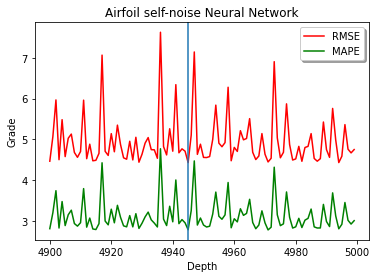

In [87]:
print('RMSE : ' + str(min(history.history['loss'])))
print('MAPE : ' + str(history.history['mean_absolute_percentage_error'][history.history['loss'].index(min(history.history['loss']))]))

fig , ax = plt.subplots()
plt.title("Airfoil self-noise Neural Network")
plt.xlabel("Depth")
plt.ylabel("Grade")
plt.plot(range(4900,5000),history.history['loss'][4900:5000],color = 'r',label="RMSE")
plt.plot(range(4900,5000),history.history['mean_absolute_percentage_error'][4900:5000],color = 'g',label="MAPE")
plt.axvline(history.history['loss'].index(min(history.history['loss'])), 0, 140)


print(history.history['loss'].index(min(history.history['loss'])))


ax.legend(loc='upper right', shadow=True) 

## >Neural Network best grade

In [108]:
print('RMSE : ' + str(min(history.history['loss'])))
print('MAPE : ' + str(history.history['mean_absolute_percentage_error'][history.history['loss'].index(min(history.history['loss']))]))


RMSE : 4.4284348487854
MAPE : 2.7808122634887695
